In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
db = pd.read_csv('C://Users//eduar//Desktop//DEV//Football//Brasileirao//database.csv',index_col=None)


In [3]:
db

,Jogador,Time,#,Nação,Pos.,Idade,Min.,Gols,Assis.,PB,PT,TC,CaG,CrtsA,CrtV,Contatos,Div,Crts,Bloqueios,xG,npxG,xAG,SCA,GCA,Cmp,Att,Cmp%,PrgP,Conduções,PrgC,Tent,Suc,Data
0,Éder,Criciúma,23,ITA,FW,37-150,57,0,0,0,0,1,0,0,0,20,1,0,0,0.0,0.0,0.0,1,0,12,16,"75,0",3,17,0,0,0,2024-04-13
1,Yannick Bolasie,Criciúma,11,COD,FW,34-325,33,0,0,0,0,0,0,1,0,9,0,0,0,0.0,0.0,0.1,4,0,4,5,"80,0",0,6,3,5,3,2024-04-13
2,Renato Kayser,Criciúma,79,BRA,FW,28-056,85,1,0,0,0,3,1,0,0,23,0,0,1,0.5,0.5,0.1,1,0,10,15,"66,7",4,14,0,1,0,2024-04-13
3,Arthur,Criciúma,35,BRA,FW,31-303,5,0,0,0,0,0,0,0,0,6,0,0,0,0.0,0.0,0.0,0,0,5,6,"83,3",1,2,0,1,1,2024-04-13
4,Marquinhos Gabriel,Criciúma,10,BRA,AM,33-267,77,0,0,0,0,1,1,1,0,40,0,1,2,0.0,0.0,0.3,4,1,22,24,"91,7",3,24,2,7,5,2024-04-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,Marllon Borges,Cuiabá,4,BRA,CB,32-153,1,0,0,0,0,0,0,0,0,2,0,0,0,0.0,0.0,0.0,0,0,1,1,"100,0",0,0,0,0,0,2024-09-16
7984,Bruno Fabiano Alves,Cuiabá,34,BRA,CB,33-153,89,0,0,0,0,0,0,0,0,36,1,1,0,0.0,0.0,0.0,0,0,26,29,"89,7",0,15,0,0,0,2024-09-16
7985,Matheus Alexandre,Cuiabá,2,BRA,RB,25-162,12,0,0,0,0,0,0,0,0,5,1,0,0,0.0,0.0,0.0,0,0,0,1,"0,0",0,1,0,0,0,2024-09-16
7986,Railan,Cuiabá,21,BRA,RB,24-190,78,0,0,0,0,0,0,0,0,60,1,5,1,0.0,0.0,0.0,1,0,38,50,"76,0",1,29,1,1,0,2024-09-16


In [27]:
# Agrupar os dados por jogador e calcular a soma dos chutes ao gol e a contagem de aparições
db_agrupado = db.groupby(['Jogador','Time']).agg(
    Total_Gols=('Gols','sum'),
    Total_Chutes=('TC', 'sum'),   # Soma dos chutes ao gol
    Aparicoes=('Jogador', 'count'), # Contagem de aparições
    Total_Chutes_Gol=('CaG', 'sum'), # Contagem de aparições
)

# Adicionar uma coluna de média (Total_Chutes / Aparicoes)
db_agrupado['Média_Chutes'] = round(db_agrupado['Total_Chutes'] / db_agrupado['Aparicoes'],2)

db_agrupado['Média_Chutes_Gol'] = round(db_agrupado['Total_Chutes_Gol'] / db_agrupado['Aparicoes'],2)

# Resetar o índice
db_agrupado.reset_index(inplace=True)

# Reorganizar as colunas para que o Ranking seja a primeira
db_agrupado = db_agrupado[['Jogador','Time' ,'Aparicoes','Total_Gols','Total_Chutes','Média_Chutes','Total_Chutes_Gol','Média_Chutes_Gol']]

In [28]:
db_agrupado

,Jogador,Time,Aparicoes,Total_Gols,Total_Chutes,Média_Chutes,Total_Chutes_Gol,Média_Chutes_Gol
0,Abner,Juventude,3,0,0,0.00,0,0.00
1,Ademir Santos,Bahia,19,1,10,0.53,4,0.21
2,Adriano Martins,Atlético Goianiense,23,0,15,0.65,5,0.22
3,Adson,Vasco da Gama,20,2,25,1.25,10,0.50
4,Agustín Canobbio,Athletico Paranaense,14,4,28,2.00,14,1.00
...,...,...,...,...,...,...,...,...
675,Álvaro Barreal,Cruzeiro,19,2,24,1.26,8,0.42
676,Ángel Romero,Corinthians,18,3,28,1.56,7,0.39
677,Éder,Criciúma,16,0,14,0.88,4,0.25
678,Éverson,Atlético Mineiro,14,0,0,0.00,0,0.00


In [46]:
filtro = db_agrupado['Aparicoes']>10
# Selecionar os 10 jogadores com o maior número de chutes
top_10_chutadores = db_agrupado[filtro].nlargest(20, 'Média_Chutes_Gol')
top_10_chutadores

,Jogador,Time,Aparicoes,Total_Gols,Total_Chutes,Média_Chutes,Total_Chutes_Gol,Média_Chutes_Gol
538,Rafael Borré,Internacional,12,5,33,2.75,14,1.17
662,Yannick Bolasie,Criciúma,22,6,56,2.55,25,1.14
162,Estevão,Palmeiras,22,9,56,2.55,23,1.05
526,Pedro,Flamengo,21,11,42,2.00,22,1.05
516,Pablo Vegetti,Vasco da Gama,23,8,78,3.39,24,1.04
4,Agustín Canobbio,Athletico Paranaense,14,4,28,2.00,14,1.00
224,Germán Cano,Fluminense,15,2,30,2.00,15,1.00
399,Luciano,São Paulo,20,7,46,2.30,19,0.95
299,Jefferson Savarino,Botafogo (RJ),17,4,32,1.88,16,0.94
551,Raphael Veiga,Palmeiras,22,3,60,2.73,20,0.91


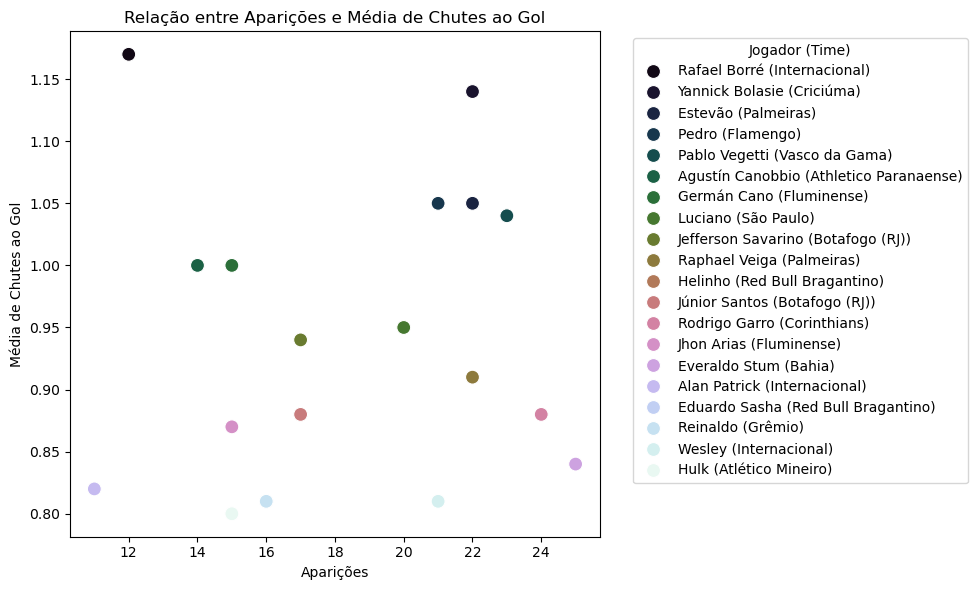

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma coluna com o nome do jogador e o time juntos
top_10_chutadores['Jogador_Time'] = top_10_chutadores['Jogador'] + ' (' + top_10_chutadores['Time'] + ')'

# Verificar o número de jogadores únicos
num_jogadores = top_10_chutadores['Jogador_Time'].nunique()

# Criar uma paleta personalizada com número suficiente de cores usando husl (variedade de cores suficiente)
palette = sns.color_palette("cubehelix", num_jogadores)


plt.figure(figsize=(10, 6))

# Plotar o gráfico com a paleta de cores sem repetição
sns.scatterplot(data=top_10_chutadores, 
                x='Aparicoes', 
                y='Média_Chutes_Gol', 
                hue='Jogador_Time',  # Usar a nova coluna na legenda
                s=100,
                palette=palette)  # Usar a paleta personalizada

# Ajustar a posição da legenda para fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Jogador (Time)')

# Títulos e rótulos dos eixos
plt.title('Relação entre Aparições e Média de Chutes ao Gol')
plt.xlabel('Aparições')
plt.ylabel('Média de Chutes ao Gol')

# Ajustar layout
plt.tight_layout()
plt.show()
